#### Import Required Libraries
This cell imports essential Python libraries for data manipulation and numerical computations:

In [1]:
import pandas as pd
import numpy as np

#### Define Project and Data Paths

In [2]:
import os
from pathlib import Path
notebook_dir = Path().resolve()   # current dir (with main.ipynb)
abs_path = notebook_dir.parents[1]
data_path = abs_path / "data"  # up one
data_path

WindowsPath('C:/Users/zazul/projects/work-scrape-analyze/data')

#### Load Job Listings Data
Reads IT job data from a `it_jobs.jl` file into a pandas DataFrame.

In [3]:
jobs_path = os.path.join(data_path, "it_jobs.jl")
df_jobs = pd.read_json(jobs_path, lines=True)
df_jobs

,job_id,job_url,title,job_data,requirements
0,6833869,https://www.work.ua/jobs/6833869/,Конструктор одягу,"{'Зарплата': '35000-45000 грн, Ставка + KPI', ...","[Уважність, Знання САПР, Clo3D]"
1,6869512,https://www.work.ua/jobs/6869512/,"Різноробочий на будівництво, озеленення","{'Зарплата': '25000-30000 грн, За результатами...","[Відповідальність, Активність, Дизайн, Уважніс..."
2,6709504,https://www.work.ua/jobs/6709504/,"Відеооператор, режисер монтажу","{'Зарплата': '29000 грн', 'Дані про компанію':...","[Adobe Premiere Pro, Adobe, Робота в команді, ..."
3,6763612,https://www.work.ua/jobs/6763612/,"Закрійник, швея-кравець в ательє","{'Зарплата': '30000-40000 грн, Процентна ставк...","[Пошиття одягу, Шиття, Ремонт одягу]"
4,6418075,https://www.work.ua/jobs/6418075/,"Моушн-дизайнер, відеограф, військовослужбовець","{'Зарплата': '40000-70000 грн', 'Дані про комп...","[Adobe Photoshop, Adobe Illustrator, Adobe Lig..."
...,...,...,...,...,...
2022,4893852,https://www.work.ua/jobs/4893852/,Закрійник у швейний цех (виробництво спецодягу),"{'Зарплата': '20000-22000 грн, Залежіть від ре...","[Відповідальність, Пунктуальність, Порядність]"
2023,6334339,https://www.work.ua/jobs/6334339/,"Оператор 3D-принтера, 3D-друкар","{'Зарплата': '30000 грн', 'Дані про компанію':...","[Відповідальність, Здатність до навчання, Уваж..."
2024,6312637,https://www.work.ua/jobs/6312637/,Фотограф,"{'Дані про компанію': 'Революшн, АН, ТОВ;Нерух...","[Adobe Photoshop, Adobe Lightroom, Adobe, Фото..."
2025,2355722,https://www.work.ua/jobs/2355722/,2D-дизайнер,"{'Зарплата': '25000 грн, По результатам работы...","[Adobe Photoshop, Adobe Illustrator, CorelDRAW..."


#### Remove Unnecessary Column
Drops the `job_url` column from the DataFrame.


In [4]:
df_jobs = df_jobs.drop("job_url", axis=1)

#### Extract Key Job Details
Pulls specific fields from the nested `job_data` dictionary and creates new columns for salary, company info, job location, conditions, and language requirements.


In [5]:
df_jobs["salary"] = df_jobs["job_data"].apply(lambda item: item.get("Зарплата", np.nan))
df_jobs["company"] = df_jobs["job_data"].apply(lambda item: item.get("Дані про компанію", np.nan))
df_jobs["location"] = df_jobs["job_data"].apply(lambda item: item.get("Місце роботи", np.nan))
df_jobs["conditions"] = df_jobs["job_data"].apply(lambda item: item.get("Умови й вимоги", np.nan))
df_jobs["lenguas"] = df_jobs["job_data"].apply(lambda item: item.get("Знання мов", np.nan))

In [6]:
df_jobs

,job_id,title,job_data,requirements,salary,company,location,conditions,lenguas
0,6833869,Конструктор одягу,"{'Зарплата': '35000-45000 грн, Ставка + KPI', ...","[Уважність, Знання САПР, Clo3D]","35000-45000 грн, Ставка + KPI",Annkers;Легка промисловість; 10-50 співробітників,NaN,"Повна зайнятість, неповна зайнятість. Досвід р...",NaN
1,6869512,"Різноробочий на будівництво, озеленення","{'Зарплата': '25000-30000 грн, За результатами...","[Відповідальність, Активність, Дизайн, Уважніс...","25000-30000 грн, За результатами співбесіди","Family Building (Оніщенко М.В., ФОП);Будівницт...",NaN,Повна зайнятість. Також готові взяти студента....,NaN
2,6709504,"Відеооператор, режисер монтажу","{'Зарплата': '29000 грн', 'Дані про компанію':...","[Adobe Premiere Pro, Adobe, Робота в команді, ...",29000 грн,"Інформер;ЗМІ, медіа; менше 10 співробітників",NaN,Повна зайнятість. Досвід роботи від 1 року.,NaN
3,6763612,"Закрійник, швея-кравець в ательє","{'Зарплата': '30000-40000 грн, Процентна ставк...","[Пошиття одягу, Шиття, Ремонт одягу]","30000-40000 грн, Процентна ставка -40%+преміі+...",Voznesenska;Послуги для населення та бізнесу; ...,NaN,Повна зайнятість. Також готові взяти людину з ...,NaN
4,6418075,"Моушн-дизайнер, відеограф, військовослужбовець","{'Зарплата': '40000-70000 грн', 'Дані про комп...","[Adobe Photoshop, Adobe Illustrator, Adobe Lig...",40000-70000 грн,"Kraken, спецпідрозділ ГУР;Сили оборони; більше...",NaN,Повна зайнятість. Досвід роботи від 1 року.,NaN
...,...,...,...,...,...,...,...,...,...
2022,4893852,Закрійник у швейний цех (виробництво спецодягу),"{'Зарплата': '20000-22000 грн, Залежіть від ре...","[Відповідальність, Пунктуальність, Порядність]","20000-22000 грн, Залежіть від результату співб...","Лідер, швейна фабрика, ТОВ;Легка промисловість...",NaN,Повна зайнятість. Досвід роботи від 2 років.,NaN
2023,6334339,"Оператор 3D-принтера, 3D-друкар","{'Зарплата': '30000 грн', 'Дані про компанію':...","[Відповідальність, Здатність до навчання, Уваж...",30000 грн,"Хімічні Авіаційні Технології, ТОВ;Машинобудува...",NaN,Повна зайнятість. Досвід роботи від 1 року.,NaN
2024,6312637,Фотограф,"{'Дані про компанію': 'Революшн, АН, ТОВ;Нерух...","[Adobe Photoshop, Adobe Lightroom, Adobe, Фото...",NaN,"Революшн, АН, ТОВ;Нерухомість; 50-250 співробі...",NaN,"Повна зайнятість, неповна зайнятість. Досвід р...",NaN
2025,2355722,2D-дизайнер,"{'Зарплата': '25000 грн, По результатам работы...","[Adobe Photoshop, Adobe Illustrator, CorelDRAW...","25000 грн, По результатам работы",Гарант і Партнери;Легка промисловість; 50-250 ...,NaN,"Повна зайнятість. Також готові взяти студента,...",NaN


#### Parse Salary Information
Changes working directory to the project root, then extracts structured salary details from the raw `salary` field using a custom helper function.

In [8]:
%cd $abs_path
from analysis.utils import extract_salary, classify_skills


df_jobs[["salary from", "salary up to", "salary conditions"]] = df_jobs["salary"].apply(
    lambda x: pd.Series(extract_salary(x))
)


C:\Users\zazul\projects\work-scrape-analyze


ValueError: invalid literal for int() with base 10: ''

#### Clean Unneeded Columns
Removes the `job_data` and `salary` columns from the DataFrame to streamline further analysis.

In [9]:
df_jobs.drop(columns=["job_data", "salary"], inplace=True)
df_jobs

,job_id,title,requirements,company,location,conditions,lenguas
0,6833869,Конструктор одягу,"[Уважність, Знання САПР, Clo3D]",Annkers;Легка промисловість; 10-50 співробітників,NaN,"Повна зайнятість, неповна зайнятість. Досвід р...",NaN
1,6869512,"Різноробочий на будівництво, озеленення","[Відповідальність, Активність, Дизайн, Уважніс...","Family Building (Оніщенко М.В., ФОП);Будівницт...",NaN,Повна зайнятість. Також готові взяти студента....,NaN
2,6709504,"Відеооператор, режисер монтажу","[Adobe Premiere Pro, Adobe, Робота в команді, ...","Інформер;ЗМІ, медіа; менше 10 співробітників",NaN,Повна зайнятість. Досвід роботи від 1 року.,NaN
3,6763612,"Закрійник, швея-кравець в ательє","[Пошиття одягу, Шиття, Ремонт одягу]",Voznesenska;Послуги для населення та бізнесу; ...,NaN,Повна зайнятість. Також готові взяти людину з ...,NaN
4,6418075,"Моушн-дизайнер, відеограф, військовослужбовець","[Adobe Photoshop, Adobe Illustrator, Adobe Lig...","Kraken, спецпідрозділ ГУР;Сили оборони; більше...",NaN,Повна зайнятість. Досвід роботи від 1 року.,NaN
...,...,...,...,...,...,...,...
2022,4893852,Закрійник у швейний цех (виробництво спецодягу),"[Відповідальність, Пунктуальність, Порядність]","Лідер, швейна фабрика, ТОВ;Легка промисловість...",NaN,Повна зайнятість. Досвід роботи від 2 років.,NaN
2023,6334339,"Оператор 3D-принтера, 3D-друкар","[Відповідальність, Здатність до навчання, Уваж...","Хімічні Авіаційні Технології, ТОВ;Машинобудува...",NaN,Повна зайнятість. Досвід роботи від 1 року.,NaN
2024,6312637,Фотограф,"[Adobe Photoshop, Adobe Lightroom, Adobe, Фото...","Революшн, АН, ТОВ;Нерухомість; 50-250 співробі...",NaN,"Повна зайнятість, неповна зайнятість. Досвід р...",NaN
2025,2355722,2D-дизайнер,"[Adobe Photoshop, Adobe Illustrator, CorelDRAW...",Гарант і Партнери;Легка промисловість; 50-250 ...,NaN,"Повна зайнятість. Також готові взяти студента,...",NaN


#### Most Common Job Titles
Extracts and counts individual job titles from the `title` column, revealing the top 25 most frequent roles in the dataset.

In [10]:
all_jobs = df_jobs["title"].explode().dropna()
all_jobs = all_jobs.value_counts()
all_jobs[:25]

title
Швачка                                   227
Флорист                                  112
Графічний дизайнер                        95
Швея                                      43
Архітектор                                36
Дизайнер                                  29
Конструктор меблів                        27
Закрійник                                 27
Помічник флориста                         23
Дизайнер інтер'єру                        21
Дизайнер меблів                           19
Фотограф                                  17
Розкрійник                                14
Конструктор одягу                         11
Відеомонтажер                             11
Кравець                                   10
Кравчиня                                  10
Відеооператор                              9
Монтажер відео                             8
Художник                                   7
Оператор вишивальної машини                7
Швачка, кравчиня                           7
Прод

Normalize names (convert to lowercase and remove extra spaces).
Replace variations of names with a single form (a little manual adjustment).

In [11]:
normalized_jobs = df_jobs["title"].explode().dropna().str.lower().str.strip()

job_replacements = {
    "project manager": "project manager",
    "project-менеджер": "project manager",
    "project менеджер": "project manager",
    "проджект-менеджер": "project manager",
    "smm-менеджер": "smm manager",
    "smm-спеціаліст": "smm manager",
    "smm-менеджер, контент-мейкер": "smm manager",
    "контент-менеджер (smm)": "smm manager",
    "контент-менеджер": "content manager",
    "бізнес-аналітик": "data analyst",
    "аналітик": "data analyst",
    "business analyst": "data analyst",
    "програміст 1c": "програміст 1C",
    "програміст 1с": "програміст 1C",
    "seo-спеціаліст": "seo specialist",
    "junior seo-спеціаліст": "seo specialist",
    "junior seo specialist": "seo specialist",
    "викладач програмування у дитячу школу": "вчитель інформатики",
    "викладач інформатики у it-школу": "вчитель інформатики",
    "інженер технічної підтримки": "support manager",
    "фахівець технічної підтримки": "support manager",
    "customer support representative": "support manager",
    "майстер з ремонту комп'ютерної техніки": "сервісний інженер",
    "спеціаліст з обслуговування терміналів": "сервісний інженер",
}

normalized_jobs = normalized_jobs.replace(job_replacements)

job_counts = normalized_jobs.value_counts()
job_counts.head(25)

title
швачка                         227
флорист                        112
графічний дизайнер              95
швея                            43
архітектор                      36
дизайнер                        29
конструктор меблів              27
закрійник                       27
помічник флориста               23
дизайнер інтер'єру              21
дизайнер меблів                 19
фотограф                        17
розкрійник                      14
відеомонтажер                   11
конструктор одягу               11
кравець                         10
motion designer                 10
кравчиня                        10
відеооператор                    9
монтажер відео                   8
дизайнер-графік                  7
продавець-флорист                7
оператор вишивальної машини      7
швачка, кравчиня                 7
художник                         7
Name: count, dtype: int64

#### Import Plotting Library
Loads `matplotlib.pyplot` for creating visualizations such as bar charts, line plots, and histograms.

In [12]:
import matplotlib.pyplot as plt

#### Horizontal Bar Chart of Top 25 IT Vacancies
Displays the 25 most frequent IT job titles from `job_counts` using a horizontal bar chart.

- `head(25)`: selects the top 25 entries
- `kind='barh'`: horizontal bar chart type
- `figsize=(8,5)`: sets the size of the chart
- `color='green'`: makes the bars green 
- `plt.title(...)`: adds a title to the chart with 12pt font

Text(0.5, 1.0, 'List of 25 most popular IT vacancies on work.ua')

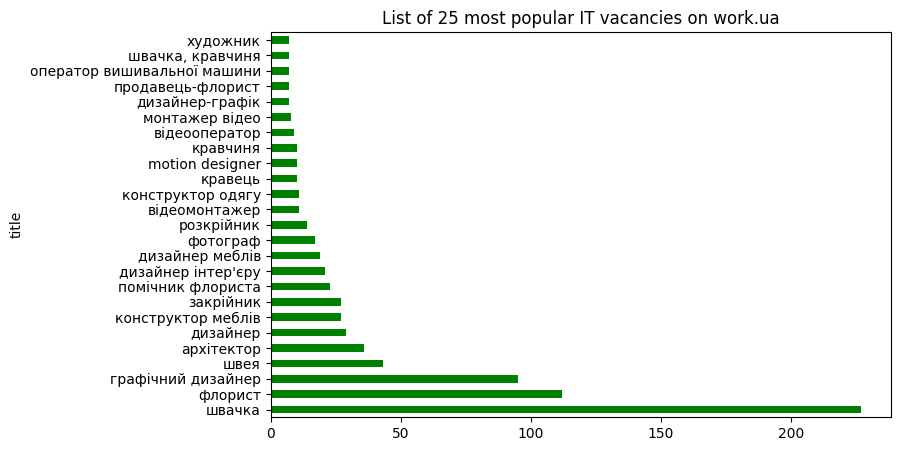

In [13]:
job_counts.head(25).plot(kind='barh', figsize=(8,5), color='green')
plt.title(f"List of 25 most popular IT vacancies on work.ua", fontsize=12)

#### Analysis of Top-25 IT Job Titles and Salaries
First, it extracts all job titles from the dataset, removes missing values, and ranks them by frequency. The top 25 most common titles are selected. 
Next, for each popular job title, the minimum and maximum values are calculated for both “salary from” and “salary up to.” 

In [14]:
# Top 25
all_jobs = df_jobs["title"].explode().dropna()
all_jobs = all_jobs.value_counts()
top_titles = all_jobs.head(25).index.tolist()

# only with 'salary'
df_clean = df_jobs.dropna(subset=["salary from", "salary up to"])
df_top = df_clean[df_clean["title"].isin(top_titles)]

# min & max on each 'title' (job)
df_range = (
    df_top.groupby("title")[["salary from", "salary up to"]]
    .agg(["min", "max"])
    .reset_index()
)
df_range.columns = ["title", "salary_from_min", "salary_from_max", "salary_to_min", "salary_to_max"]


KeyError: ['salary from', 'salary up to']

#### Visualization of Salary Ranges for Top IT Vacancies
To compare min and max salary ranges for the 25 most frequent IT job titles:
- The first bar segment (`salary_from_min`) is plotted in **light blue**, representing the base salary.
- The second bar segment (`delta`) is stacked to the right of the first, shown in **salmon**, indicating the range up to the maximum salary.
Result: A comprehensive visual summary of salary variability across popular IT roles.

In [15]:
df_range["delta"] = df_range["salary_to_max"] - df_range["salary_from_min"]

plt.figure(figsize=(12,10))

plt.barh(df_range["title"],
         df_range["salary_from_min"],
         color="lightblue", label="Min salary")

plt.barh(df_range["title"],
         df_range["delta"],
         left=df_range["salary_from_min"],
         color="salmon", label="Salary range to max")

for i in range(len(df_range)):
    plt.text(df_range["salary_from_min"].iloc[i], i,
             f"{int(df_range['salary_from_min'].iloc[i])}", va="center", ha="center", color="black", fontsize=8)
    plt.text(df_range["salary_to_max"].iloc[i], i,
             f"{int(df_range['salary_to_max'].iloc[i])}", va="center", ha="left", color="black", fontsize=8)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Salary")
plt.ylabel("Vacancies with the specified salary (top 25 by frequency)")
plt.title("Minimum and maximum salaries for the most common IT vacancies (where the salary is indicated)")
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'df_range' is not defined

#### Project topic: Skill analysis for specific developer roles.
While the DataFrame `df_jobs` allows you to analyze skills by various categories,
the main goal of the project is to **collect and visualize skills** (e.g. **Python developer**). To do this, we will narrow the search to jobs **named by keywords retrieved from `words.json`**.

#### Load and Rename Refined Job Requirements Dataset
Result: `df_refine_reqs` now holds the refined job requirements, ready for analysis or merging

In [16]:
refine_path = os.path.join(data_path, "refine_reqs.jl")
df_refine_reqs = pd.read_json(refine_path, lines=True)
df_refine_reqs.rename(columns={"job_id": "rejob_id"}, inplace=True)
df_refine_reqs

,rejob_id,requirements
0,6898720,"[офіційне працевлаштування, Adobe, AI, Відпові..."
1,6386509,"[Креативність, уважність, Уважність до деталей..."
2,6921853,"[Створення прототипів, Adobe, Відповідальність..."
3,6400312,"[Adobe, User Flow, Адаптивність, Дизайн, Figma..."
4,5688081,"[Figma, досвід роботи]"
...,...,...
189,6856621,"[Проєктування, Figma, Digital Art]"
190,6845707,"[Adobe, Бажання працювати, Відповідальність, Д..."
191,6930613,"[Креативність, Adobe, SMM, Figma, Adobe Photos..."
192,6924202,"[Відкрита, Marketing, офіційне працевлаштуванн..."


#### Integrating Refined Job Requirements into Main Dataset
This code integrates detailed job requirements into the main `df_jobs` DataFrame and prepares a subset of merged data: only matching jobs get enriched requirement details.
Creates `df_refine_only`, a dataset where refined requirements are available alongside other job info.

In [17]:
reqs_map = df_refine_reqs.set_index("rejob_id")["requirements"]
df_jobs.loc[df_jobs["job_id"].isin(reqs_map.index), "requirements"] = df_jobs["job_id"].map(reqs_map)

df_refine_only = df_jobs.merge(df_refine_reqs, left_on="job_id", right_on="rejob_id")

#### Final Cleanup and Renaming of Refined Job Dataset
This final step polishes the merged `df_refine_only` dataset for clearer structure and usability

In [18]:
df_refine_only.drop(columns=["requirements_x", "rejob_id"], inplace=True)
df_refine_only.rename(columns={"requirements_y": "skills"}, inplace=True)
df_refine_only

,job_id,title,company,location,conditions,lenguas,skills
0,6821371,Junior UI/UX Designer,WinWin Travel;Туризм; менше 10 співробітників,Дистанційна робота,"Повна зайнятість, неповна зайнятість. Також го...",NaN,"[Figma, Google Sheets]"
1,5761195,Designer (affiliate marketing),"Punch Agency;Маркетинг, реклама, PR; 10-50 спі...",Дистанційна робота,Повна зайнятість. Досвід роботи від 1 року.,Англійська — середній,"[Marketing, Adobe, Figma, Комунікабельність, A..."
2,6895120,Веб-дизайнер/дизайнерка,"Starlight Media;ЗМІ, медіа; більше 1000 співро...",Дистанційна робота,Повна зайнятість. Досвід роботи від 2 років. В...,NaN,"[Відкритість, Adobe, уважність, Уважність до д..."
3,6916681,2D Artist (Mobile Games),COG Interactive;IT; менше 10 співробітників,Дистанційна робота,Повна зайнятість. Досвід роботи від 2 років.,NaN,"[Креативность, Unity, Figma]"
4,5475076,Викладач з web-дизайну,"ДарвінЛенд;Освіта, наука; 10-50 співробітників",Дистанційна робота,Неповна зайнятість. Досвід роботи від 1 року.,NaN,"[Викладання, Figma]"
...,...,...,...,...,...,...,...
189,3648402,Маркетинг-дизайнер в агентство digital-маркетингу,"Blender, маркетингова агенція;Маркетинг, рекла...",NaN,Повна зайнятість. Також готові взяти студента....,NaN,"[Створення рекламних креативів, Adobe, Blender..."
190,6811084,Графічний дизайнер,"Blest;Будівельна промисловість, деревообробка;...",NaN,Повна зайнятість. Досвід роботи від 2 років.,NaN,"[Створення рекламних креативів, офіційне праце..."
191,6899164,"Графічний дизайнер для e-commerce (3D, AI-конт...",AG LLC;Роздрібна торгівля; 10-50 співробітників,Дистанційна робота,Повна зайнятість. Досвід роботи від 1 року.,Англійська — вище середнього,"[AI, Adobe, Adobe Photoshop, Дизайн, Canva, Fi..."
192,5566977,Designer,"Trfman Digital LTD;Маркетинг, реклама, PR; 10-...",Дистанційна робота,Неповна зайнятість. Також готові взяти студент...,NaN,"[уважність, Уважність до деталей, Figma, Стара..."


Accessing Refined Skills Data

In [19]:
df_refine_only["skills"]

0                                 [Figma, Google Sheets]
1      [Marketing, Adobe, Figma, Комунікабельність, A...
2      [Відкритість, Adobe, уважність, Уважність до д...
3                           [Креативность, Unity, Figma]
4                                    [Викладання, Figma]
                             ...                        
189    [Створення рекламних креативів, Adobe, Blender...
190    [Створення рекламних креативів, офіційне праце...
191    [AI, Adobe, Adobe Photoshop, Дизайн, Canva, Fi...
192    [уважність, Уважність до деталей, Figma, Стара...
193    [Відкрита, Креативність, Відкритість, Adobe, В...
Name: skills, Length: 194, dtype: object

#### Top 25 Most Frequent Skills in Refined IT Job Requirements
 Result: A ranked Series of the most in-demand IT skills from your dataset.

In [20]:
all_skills = df_refine_only["skills"].explode().dropna()
skill_counts = all_skills.value_counts()
skill_counts[:25]

skills
Figma                        193
Adobe                        107
досвід роботи                101
Дизайн                        96
Adobe Photoshop               58
Відповідальність              54
Креативність                  39
AI                            32
Adobe Illustrator             31
Уважність                     29
уважність                     29
офіційне працевлаштування     28
Canva                         28
SMM                           27
Уважність до деталей          24
Midjourney                    22
Design                        20
Маркетинг                     19
Ініціативність                18
Motion                        17
Відкритість                   12
Гнучкість                     12
Швидкість                     12
Marketing                     10
Adobe Creative Suite          10
Name: count, dtype: int64

#### Prepare Keyword List
This block reads a list of keywords to display focused search words on graphs.

In [21]:
words_path = os.path.join(data_path, "words.json")
words = pd.read_json(words_path)
words_to_title = words.iloc[:, 0].tolist()
words_to_title = " | ".join(words_to_title)
words_to_title

'Figma'

#### Visualization of Top 25 Skills in Relevant Vacancies
Creates a horizontal bar chart displaying the frequency of the top 25 most in-demand skills from refined job  with requirements that in  `words.json`.

Text(0.5, 1.0, "Frequency of skills in vacancies requiring knowledge of 'Figma' (on work.ua)")

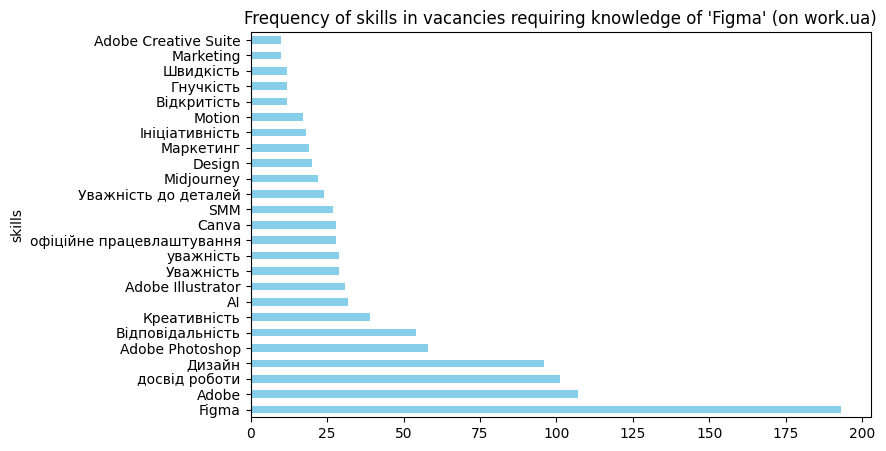

In [22]:
skill_counts.head(25).plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title(f"Frequency of skills in vacancies requiring knowledge of '{words_to_title}' (on work.ua)", fontsize=12)

#### Skill Normalization Using Mapping Dictionary
##skill-normalization-using
This snippet standardizes skill names within a DataFrame using a custom mapping dictionary for more consistent analysis.
To unify different representations of the same skill (e.g. `'JS'`, `'JavaScript'`; `'English'`, `'Англійська мова'`). Helps improve the accuracy of skill frequency counts and visualizations.
_(requires manual setup)_

In [23]:
skill_mapping = {
    'JS': 'JavaScript',
    'google': 'Google',
    'Англійська мова': 'Англійська',
    'English': 'Англійська',
    'Знання SQL': 'SQL',
    'Programming': 'Програмування',
    'Системи безпеки': 'Security Systems',
    'Design': 'Дизайн',
    'stm32': 'STM32',
    'Розробка ПЗ': 'Розробка',
    'Розробка API': 'Розробка',
    'Програмування': 'Програмування',
    'розробка': 'Розробка',
    'Тестування': 'Тестування',
    'API': 'REST API',
    'linux': 'Linux',
    'GitHub Actions': 'GitHub',
    'Аналітичне мислення': 'Аналітичні здібності',
    'електроніка': 'Електроніка',
    'nginx': 'Nginx',
    'support': 'Support',
    'Ведення': 'Support',
    'Responsibility': 'Відповідальність',
}

df_refine_only['skills'] = df_refine_only['skills'].apply(
    lambda skills: [skill_mapping.get(s.strip(), s.strip()) for s in skills]
)
df_refine_only['skills']

0                                 [Figma, Google Sheets]
1      [Marketing, Adobe, Figma, Комунікабельність, A...
2      [Відкритість, Adobe, уважність, Уважність до д...
3                           [Креативность, Unity, Figma]
4                                    [Викладання, Figma]
                             ...                        
189    [Створення рекламних креативів, Adobe, Blender...
190    [Створення рекламних креативів, офіційне праце...
191    [AI, Adobe, Adobe Photoshop, Дизайн, Canva, Fi...
192    [уважність, Уважність до деталей, Figma, Стара...
193    [Відкрита, Креативність, Відкритість, Adobe, В...
Name: skills, Length: 194, dtype: object

Text(0.5, 1.0, "Frequency of skills in vacancies requiring knowledge of 'Figma' (on work.ua)")

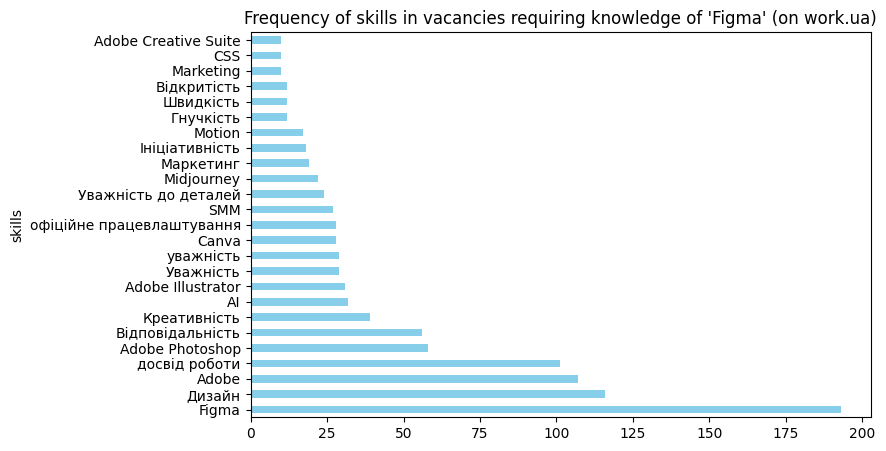

In [24]:
all_skills = df_refine_only["skills"].explode().dropna()
skill_counts = all_skills.value_counts()
skill_counts.head(25).plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title(f"Frequency of skills in vacancies requiring knowledge of '{words_to_title}' (on work.ua)", fontsize=12)


####  Next Step: Skill Categorization
This version looks cleaner already, but it’s still not very informative in terms of the types of skills.  
To improve clarity and deliver more meaningful insights, I plan to **categorize the skills** into three separate groups:
- **Technical Skills**
- **Soft Skills**
- **General/Other Skills**

#### Skill Classification and Integration

In [25]:
classified_df = df_refine_only["skills"].apply(classify_skills)
df_refine_only = pd.concat([df_refine_only, classified_df], axis=1)
df_refine_only


,job_id,title,company,location,conditions,lenguas,skills,Tech,Soft,General,Not_classified
0,6821371,Junior UI/UX Designer,WinWin Travel;Туризм; менше 10 співробітників,Дистанційна робота,"Повна зайнятість, неповна зайнятість. Також го...",NaN,"[Figma, Google Sheets]","[Figma, Google Sheets]",[],[],[]
1,5761195,Designer (affiliate marketing),"Punch Agency;Маркетинг, реклама, PR; 10-50 спі...",Дистанційна робота,Повна зайнятість. Досвід роботи від 1 року.,Англійська — середній,"[Marketing, Adobe, Figma, Комунікабельність, A...",[Figma],[Комунікабельність],[Marketing],"[Adobe, Adobe Photoshop, досвід роботи]"
2,6895120,Веб-дизайнер/дизайнерка,"Starlight Media;ЗМІ, медіа; більше 1000 співро...",Дистанційна робота,Повна зайнятість. Досвід роботи від 2 років. В...,NaN,"[Відкритість, Adobe, уважність, Уважність до д...",[Figma],"[Відкритість, Гнучкість, Ініціативність, Уважн...",[],"[Adobe, уважність, Уважність до деталей, Googl..."
3,6916681,2D Artist (Mobile Games),COG Interactive;IT; менше 10 співробітників,Дистанційна робота,Повна зайнятість. Досвід роботи від 2 років.,NaN,"[Креативность, Unity, Figma]","[Unity, Figma]",[],[],[Креативность]
4,5475076,Викладач з web-дизайну,"ДарвінЛенд;Освіта, наука; 10-50 співробітників",Дистанційна робота,Неповна зайнятість. Досвід роботи від 1 року.,NaN,"[Викладання, Figma]",[Figma],[Викладання],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
189,3648402,Маркетинг-дизайнер в агентство digital-маркетингу,"Blender, маркетингова агенція;Маркетинг, рекла...",NaN,Повна зайнятість. Також готові взяти студента....,NaN,"[Створення рекламних креативів, Adobe, Blender...","[Blender, Figma]",[],[],"[Створення рекламних креативів, Adobe, Google ..."
190,6811084,Графічний дизайнер,"Blest;Будівельна промисловість, деревообробка;...",NaN,Повна зайнятість. Досвід роботи від 2 років.,NaN,"[Створення рекламних креативів, офіційне праце...",[Figma],[Відповідальність],[Дизайн],"[Створення рекламних креативів, офіційне праце..."
191,6899164,"Графічний дизайнер для e-commerce (3D, AI-конт...",AG LLC;Роздрібна торгівля; 10-50 співробітників,Дистанційна робота,Повна зайнятість. Досвід роботи від 1 року.,Англійська — вище середнього,"[AI, Adobe, Adobe Photoshop, Дизайн, Canva, Fi...",[Figma],[],"[AI, Дизайн, Canva, Моделювання]","[Adobe, Adobe Photoshop, Midjourney, 3D-моделю..."
192,5566977,Designer,"Trfman Digital LTD;Маркетинг, реклама, PR; 10-...",Дистанційна робота,Неповна зайнятість. Також готові взяти студент...,NaN,"[уважність, Уважність до деталей, Figma, Стара...",[Figma],[Уважність],[],"[уважність, Уважність до деталей, Старанність,..."


Heads-up: If you accidentally run the previous code twice. In that case, this line would output: <class 'pandas.core.frame.DataFrame'>.
Why it matters: Code written for a Series may break or behave unexpectedly if the object is actually a DataFrame. Must be:  <class 'pandas.core.series.Series'>.

If you see the wrong format, uncomment the next line, remove the columns (they are doubled) and go back to the previous point: **Skill Classification and Integration**. _Don't forget to comment again after_

In [26]:

# df_refine_only = df_refine_only.drop(columns=["Tech", "Soft", "General", "Not_classified"])	
print(type(df_refine_only["Tech"])) 

<class 'pandas.core.series.Series'>


#### Skill Count Extraction from DataFrame Columns
This code processes four columns in the `df_refine_only` DataFrame that contain categorized skill sets.  

In [27]:
tech_counts = df_refine_only["Tech"].explode().value_counts()
soft_counts = df_refine_only["Soft"].explode().value_counts()
general_counts = df_refine_only["General"].explode().value_counts()
not_class_counts = df_refine_only["Not_classified"].explode().value_counts()

In [28]:
not_class_counts[:25]

Not_classified
Adobe                        107
досвід роботи                101
Adobe Photoshop               58
Adobe Illustrator             31
уважність                     29
офіційне працевлаштування     28
SMM                           27
Уважність до деталей          24
Midjourney                    22
Маркетинг                     19
Motion                        17
Швидкість                     12
Adobe After Effects           10
Adobe Creative Suite          10
Дотримання дедлайнів           8
Behance                        8
CorelDRAW                      7
Створення презентацій          7
бажання працювати              6
Верстка                        6
Бажання працювати              6
Trello                         5
Adobe XD                       5
Пунктуальність                 5
Відкрита                       5
Name: count, dtype: int64

### Visualizing Skill Frequencies by Category.
The following code creates a 2x2 grid of horizontal bar charts to visualize the top 25 skills in each category found in vacancies related to `words.json` on work.ua.

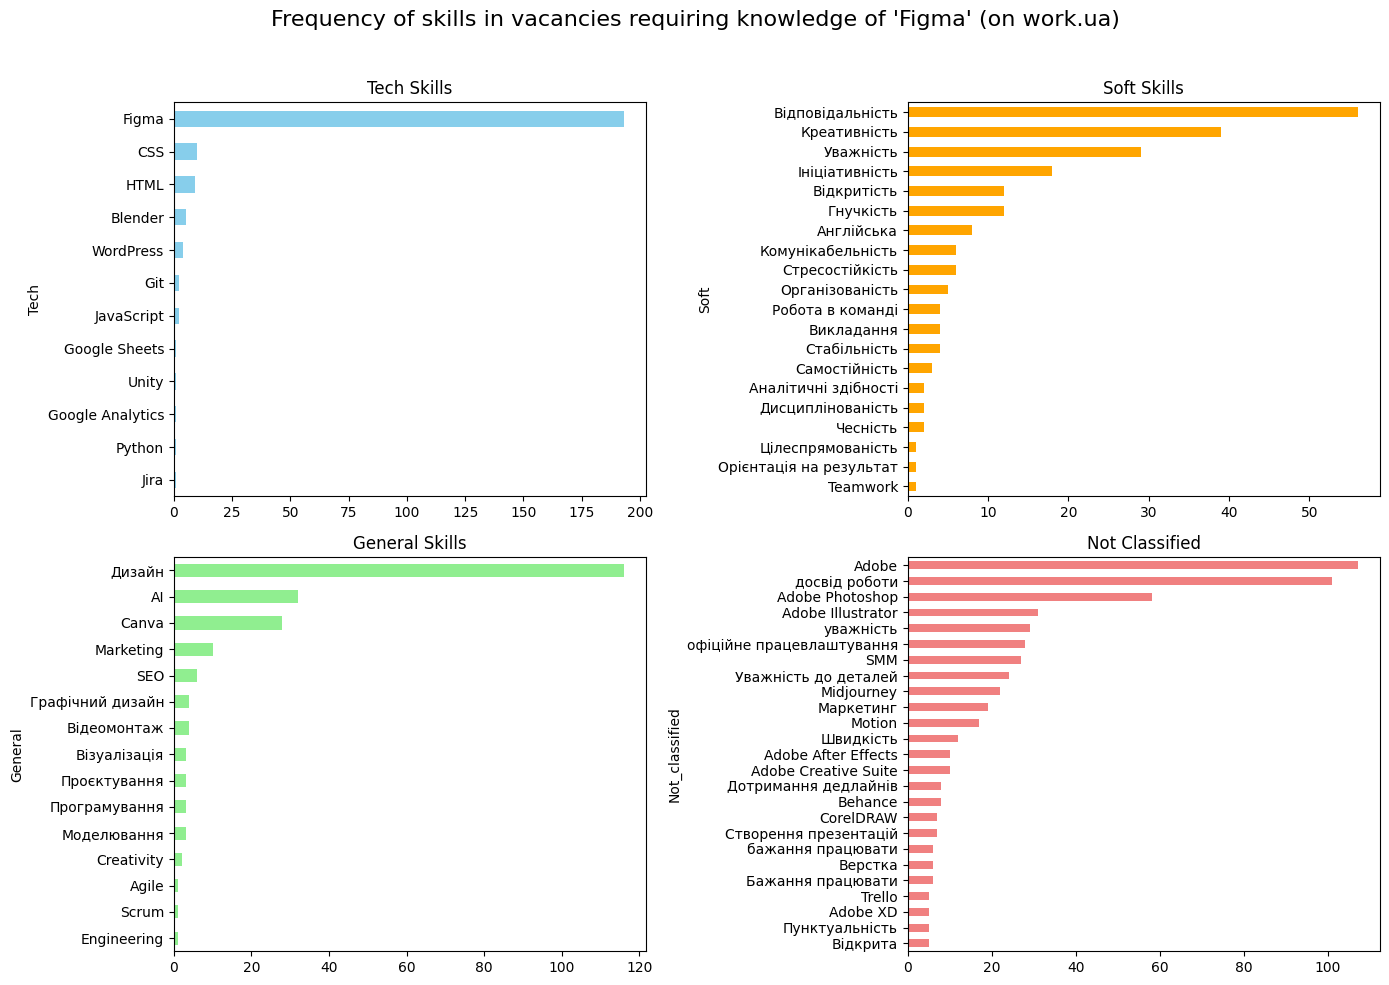

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f"Frequency of skills in vacancies requiring knowledge of '{words_to_title}' (on work.ua)", fontsize=16)

# Tech-skills
tech_counts.head(25).plot(kind='barh', ax=axes[0,0], color='skyblue', title='Tech Skills')
axes[0,0].invert_yaxis()

# Soft-skills
soft_counts.head(25).plot(kind='barh', ax=axes[0,1], color='orange', title='Soft Skills')
axes[0,1].invert_yaxis()

# General-skills
general_counts.head(25).plot(kind='barh', ax=axes[1,0], color='lightgreen', title='General Skills')
axes[1,0].invert_yaxis()

# Not_classified
not_class_counts.head(25).plot(kind='barh', ax=axes[1,1], color='lightcoral', title='Not Classified')
axes[1,1].invert_yaxis()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Skill Categorization Note.
We pay special attention to the listed skills, as it's possible that some of them may have been accidentally assigned to the wrong category. Go to **Skill Normalization Using Mapping Dictionary**.
However, our main focus is on the **"Not Cclassified"** skills.
If we notice that certain skills appear frequently in this category—and they clearly belong to one of the known classifications (e.g. Tech, Soft, or General)—then it's recommended to reassign them to the appropriate skill category for a more accurate qualification mapping.

**_This can be done in the `analysis/skills_by_classe.json` file. Simply add the skill  (that not classified) to the appropriate category._**

In [30]:
not_class_counts[0:25]

Not_classified
Adobe                        107
досвід роботи                101
Adobe Photoshop               58
Adobe Illustrator             31
уважність                     29
офіційне працевлаштування     28
SMM                           27
Уважність до деталей          24
Midjourney                    22
Маркетинг                     19
Motion                        17
Швидкість                     12
Adobe After Effects           10
Adobe Creative Suite          10
Дотримання дедлайнів           8
Behance                        8
CorelDRAW                      7
Створення презентацій          7
бажання працювати              6
Верстка                        6
Бажання працювати              6
Trello                         5
Adobe XD                       5
Пунктуальність                 5
Відкрита                       5
Name: count, dtype: int64